# Understanding the dataset
Title: Haberman’s Survival Data
Description: 
       The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings        Hospital on the survival of patients who had undergone surgery for breast cancer.

# Attribute Information:

1. Age of patient at the time of operation (numerical)
2. Patient’s year of operation (year — 1900, numerical)
4. Number of positive axillary nodes detected (numerical)
5. Survival status (class attribute) :
   1 = the patient survived 5 years or longer
   2 = the patient died within 5 years

# Objective:
The main object of this data analysis is to determine wheather the patient have survived or not survived 5 years after operation.

In [23]:
# importing libraries  and 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
#Reading dataset and printing first five entry from dataset
dataset = pd.read_csv('E:/python/datascience/iris-dataset-analysis/EDA/haberman.csv')
print(dataset.head())

   Age  year  positive_axillary_nodes  survival_status
0   30    64                        1                1
1   30    62                        3                1
2   30    65                        0                1
3   31    59                        2                1
4   31    65                        4                1


In [3]:
dataset.shape

# The dataset contain 306 rows and 4 columns

(306, 4)

In [6]:
# Printing Columns Name of our dataset
dataset.columns

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')

In [20]:
# printing how many points are present in each survival_status
print(dataset.iloc[:,:-1].describe())
print("*"*50)
print(dataset.iloc[:,-1].value_counts())
print("*"*50)
print(dataset.iloc[:,-1].value_counts(normalize=True))

              Age        year  positive_axillary_nodes
count  306.000000  306.000000               306.000000
mean    52.457516   62.852941                 4.026144
std     10.803452    3.249405                 7.189654
min     30.000000   58.000000                 0.000000
25%     44.000000   60.000000                 0.000000
50%     52.000000   63.000000                 1.000000
75%     60.750000   65.750000                 4.000000
max     83.000000   69.000000                52.000000
**************************************************
1    225
2     81
Name: survival_status, dtype: int64
**************************************************
1    0.735294
2    0.264706
Name: survival_status, dtype: float64


# Observations:
1. The age of patient varies from 30 to 83 . The agverage age (median) of patient is 52, 25% of patient age is less then 44 and    75% of patient age is less then 60.
2. The nodes present in patient varies from 0 to 52 with agerage number of node nearly 5, 25% of pateint have 0 node and 75%      patient have node less then 5.
3. The dataset contains 306 records only with feature age ,year, positive_axillary_nodes and survival status.
4. The value count function tells that how many points are present for each class (status)here it tells that how many patients    survived  then 5 years after operation and how many patients survived less then 5 years.
5. Here out of 306 , 255 survived and 81 did not survived.
6. The dataset is imbalanced beacuse 74 % of patient survived and  

# Univarient Analysis[PDF and CDF ANALYSIS]

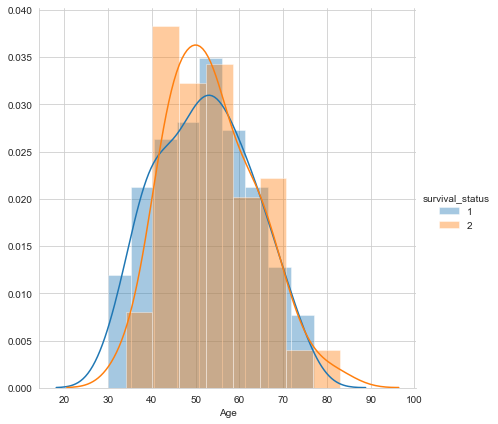

In [4]:
# PDF Analysis
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"Age").add_legend()
plt.show()



# Observations:
 1. Most of the points are overlaping . which tells that survival change of a patient are not depend on the age.  Although due     to   overlaping we can say that person whose age are in range of 30-40 have high chance of survival and 40-60 have less         chance of survival. person having age in range 60 t0 75 have equal chance of surviving or not surviving.
 2. It can not be our final conclusion . We can not decide the survival chance of a patient just by considering the age             parameter

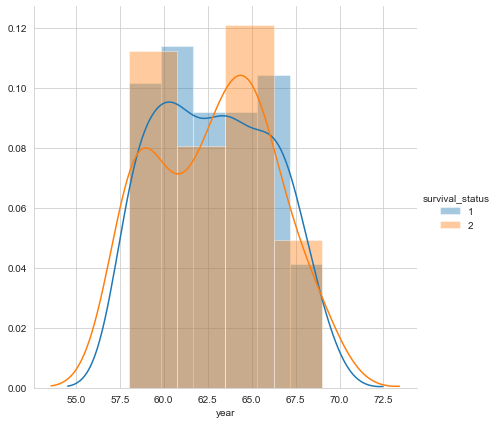

In [5]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"year").add_legend()
plt.show()



# Observation
 In this graph also most of the points are overlaping.This graph can only tells that how many operation are successful and 
 how many are unsuccessful.Hence this can not be the parameter to decide the survival change of a patient.
 form this graph we can say the in the range of year 1960 to 1965 most of the operation was unsuccesful.

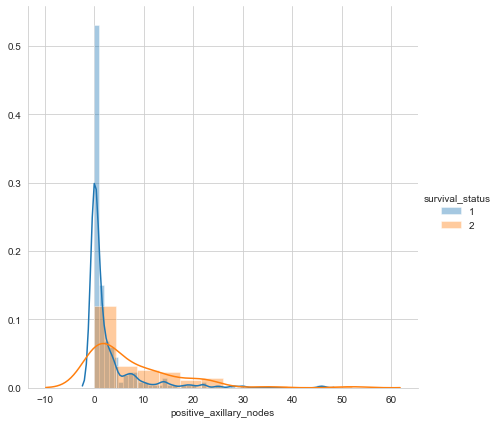

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"positive_axillary_nodes").add_legend()
plt.show()


# Observation
 From this graph we can say that patient having no node or one one have more chances to survive .
 If patient having node greater then 25 ,have very less chance of survival.

# CDF ANALYSIS

# What is CDF ?
It is used to show the probablity of what percentage of points or value are below or eqaul to a value x.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


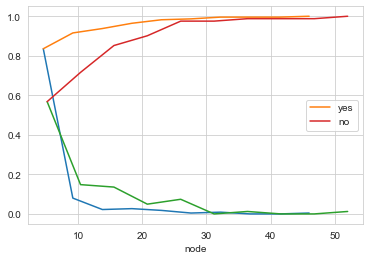

In [16]:
status_yes = dataset.loc[dataset["survival_status"]==1]
status_no = dataset.loc[dataset["survival_status"]==2]
counts,edge = np.histogram(status_yes['positive_axillary_nodes'],bins=10,density=True)

pdf = counts/sum(counts)
print(pdf)
print(edge)
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(edge[1:],pdf)
plt.plot(edge[1:],cdf,label="yes")
plt.xlabel('node')
print("==============================================")
counts1,edge1 = np.histogram(status_no['positive_axillary_nodes'],bins=10,density=True)
pdf1 = counts1/sum(counts1)
print(pdf1)
print(edge1)
cdf1 = np.cumsum(pdf1)
plt.plot(edge1[1:],pdf1)
plt.plot(edge1[1:],cdf1,label="no")
plt.xlabel('node')
plt.legend()
plt.show()

# observation
 From the cdf graph we can say that 83.55% of patient have survived how has node less then 5.

# Boxplot
In Boxplot lower line and upper lines indicate the 25th and 75th percentile  ,middle line indicate the median value of dataset.
whiskers tells about range of data.Outlier points are those past the end of the whiskers

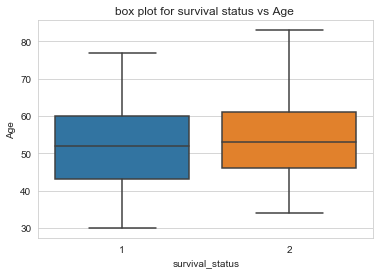

In [4]:
sns.set_style('whitegrid')
sns.boxplot(x="survival_status",y="Age",data=dataset).set_title('box plot for survival status vs Age ')
plt.show()

# Observation
From the box plot of survival status vs age , we can see that the 50th percentile (median) of status survived and not survived
are nearly same.Thus we can not decide the survival status of a patient based on age parameter.

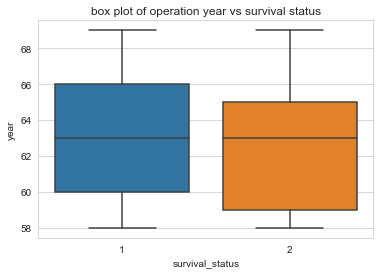

In [9]:
sns.set_style("whitegrid")
sns.boxplot(x="survival_status",y="year",data=dataset).set_title("box plot of operation year vs survival status")
plt.show()


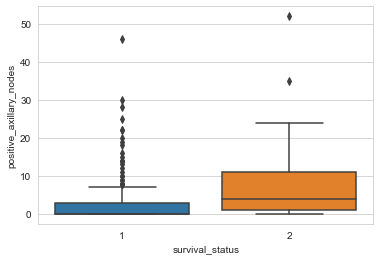

In [55]:
sns.set_style("whitegrid")
sns.boxplot(x="survival_status",y="positive_axillary_nodes",data=dataset)
plt.show()

# Observation:
1. form this plot we can see that the even patient have zero node will not survived and patient having maximum 46 nodes can        survive.
2. The 25th percentile and 50th percentile are same for status survived (1=survived) with threshold value 0 to 7.
3. for status not survived (2=not survived) 25th percentile of nodes is 1 or 2 , 50th percentile is nearly same to 75th            percentile of status survived and 75th percentile is 12 with threshold 0 t0 25 .The outlier nodes value is 52 for not          survived

# Violin plot
It is combination of boxplot and pdf


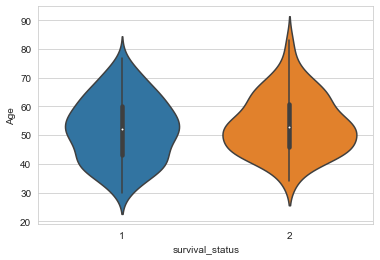

In [58]:
sns.set_style('whitegrid')
sns.violinplot(x="survival_status",y="Age",data=dataset)
plt.show()

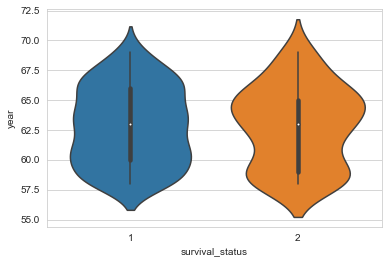

In [60]:
sns.set_style("whitegrid")
sns.violinplot(x="survival_status",y="year",data=dataset)
plt.show()

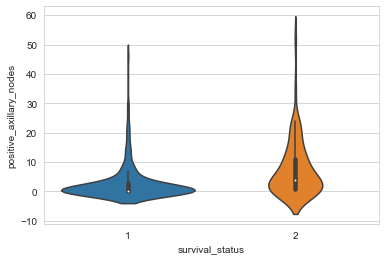

In [63]:
sns.set_style("whitegrid")
sns.violinplot(x="survival_status",y="positive_axillary_nodes",data=dataset)
plt.show()

# Observation
1. form boxplot 1 the density of patient survived is variy form 0 to 7 nodes with threshold of nearly 4.
2. for status not survived the density of node variy from 0 to 25 with threshold of 0 to 12 nodes.

# Multivariate Analysis[Pair Plot]

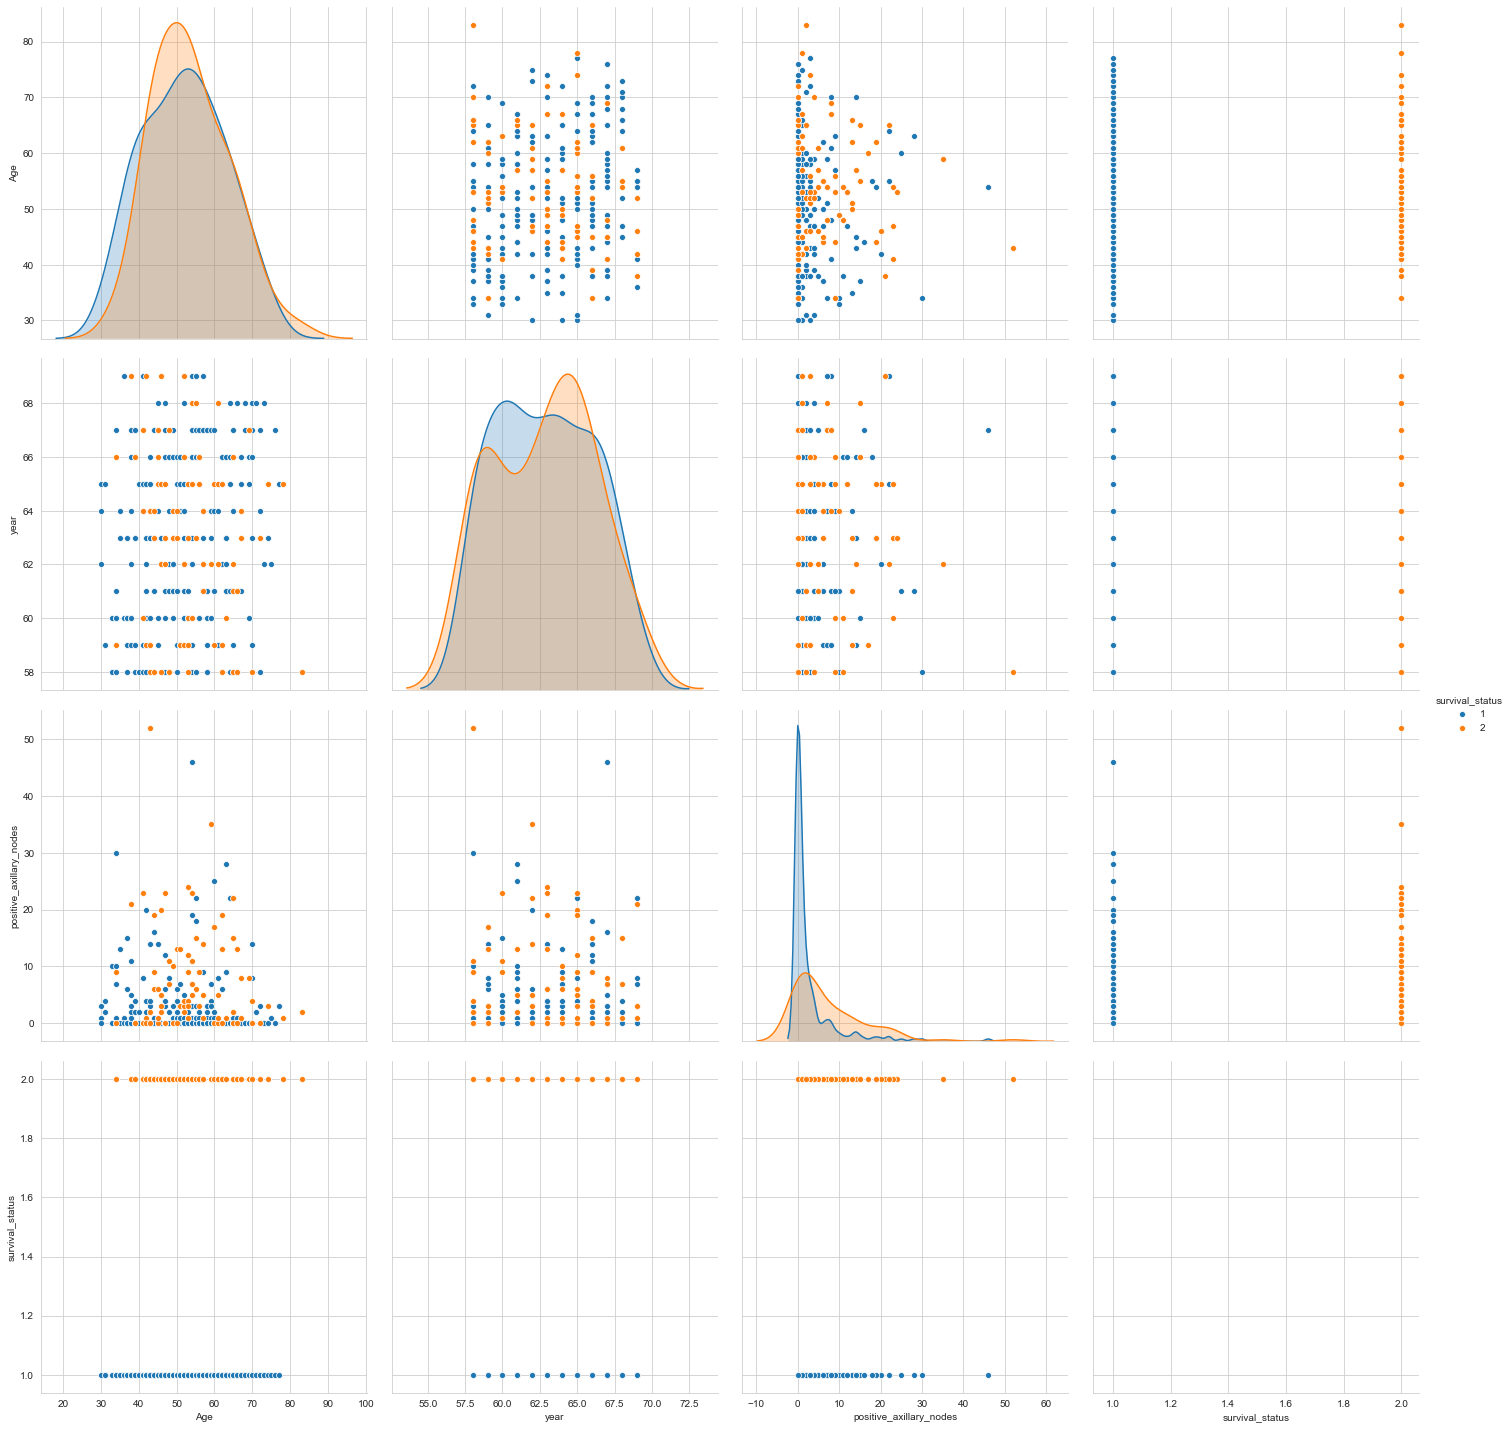

In [9]:
sns.set_style('whitegrid')
sns.pairplot(dataset,hue='survival_status',height=5)
plt.show()

   # Counter Plot

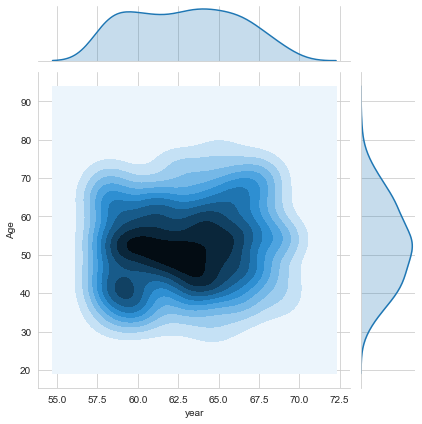

In [21]:
sns.set_style("whitegrid")
sns.jointplot(x="year",y="Age",data=dataset,kind="kde")
plt.show()

# Conclusions:

1. patient age , operation year and nodes alone are not deciding factor for survival of paitent. 
2. we also show that even patient having 0 nodes can not alway survive.
3. The objective of deciding the survival of new patient based on given features Age,year of opreration and nodes are very
   difficult task as most of points are overlaping.